In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1: Implement lại các loss và r_squared bằng numpy

In [2]:
def mse(y_true: np.array, y_pred: np.array):
    return ((y_true - y_pred)**2).mean()

def rmse(y_true: np.array, y_pred: np.array):
    return np.sqrt(((y_true-y_pred)**2).mean())

def mae(y_true: np.array, y_pred: np.array):
    return (np.abs(y_true-y_pred)).mean()

def mape(y_true: np.array, y_pred: np.array):
    return (np.abs(y_true-y_pred)/y_true).mean()


In [3]:
# Các bạn có thể thử với dữ liệu ở đây
a = np.array([1,2,3,4,5])
b = np.array([1,4,4,4,5])
print(mse(a,b))
print(rmse(a,b))
print(mae(a,b))
print(mape(a,b))
print('\n\n')

1.0
1.0
0.6
0.26666666666666666





# 2: Implement lại Ridge Regression

In [4]:
class RidgeRegression:
    def __init__(self):
        self.w = None #khởi tạo tham số
    
    def fit(self, X, y, lambda_ = 0.1):        
        m, n = X.shape #lấy shape của X
        I = np.identity(n) #tạo ra ma trận identity với n*n
        self.w = np.linalg.inv(X.T@X + lambda_*I)@X.T@y
        return self.w

    def predict(self, new_X):
        return np.dot(new_X, self.w)

#3: Tạo dữ liệu toy_data

In [5]:
def create_toy_data(func, sample_size=100, standard_deviation=0.25):
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale=standard_deviation, size=x.shape)
    return x, y

def func(x):
    return np.sin(2 * np.pi * x)

In [6]:
x, y = create_toy_data(func, sample_size=100, standard_deviation=0.25)


In [7]:
#train, test split
x_train, x_test = train_test_split(x, test_size=0.2, random_state=25)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=25)

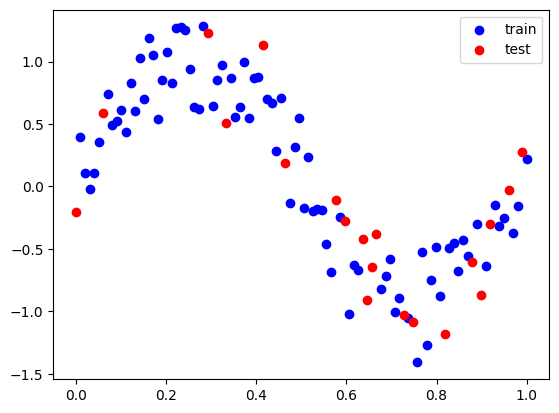

In [8]:
#visualize train, test faction
plt.scatter(x_train, y_train, color = 'blue', label = 'train')
plt.scatter(x_test, y_test, color = 'red', label = 'test')
plt.legend()

# 3b: Lần lượt fit các model đa thức bậc 0, 1, 2,...,9

In [18]:
#tạo ma trận variable cho đa thức bậc degree
def create_design_matrix(x, degree):
  # Khởi tạo ma trận toàn 1 với degree + 1 cột
  X = np.ones((len(x), degree + 1)) 

  for i in range (1, degree + 1):
    X[:, i] = x ** i

  return X

model = RidgeRegression()
for degree in range(10):
  X_train = create_design_matrix(x_train, degree)
  X_test = create_design_matrix(x_test, degree)
  w = model.fit(X_train, y_train, lambda_ = 0.1 )
  loss_train = rmse(y_train, model.predict(X_train))
  loss_test = rmse(y_test, model.predict(X_test))

  print(f'degree: {degree}, loss_train: {loss_train}, loss_test: {loss_test}')



degree: 0, loss_train: 0.7041350182188791, loss_test: 0.7626934044571103
degree: 1, loss_train: 0.4799292512971421, loss_test: 0.5958823662324011
degree: 2, loss_train: 0.4795537585709017, loss_test: 0.601219352715782
degree: 3, loss_train: 0.4495458971885909, loss_test: 0.5559682673495557
degree: 4, loss_train: 0.40065324165018695, loss_test: 0.4858956381672076
degree: 5, loss_train: 0.3627224997136965, loss_test: 0.42655448010658076
degree: 6, loss_train: 0.34459822739298007, loss_test: 0.3900541672918384
degree: 7, loss_train: 0.33998975351616395, loss_test: 0.3724224606659101
degree: 8, loss_train: 0.34095688494497983, loss_test: 0.3658389599777134
degree: 9, loss_train: 0.34287983738486133, loss_test: 0.3642480207130847


## Nhận xét

# 3c: Với mỗi mô hình, tính loss train/val và nhận xét xem mô hình bị overfitting hay underfitting.

In [ ]:
# code here

## Nhận xét

# 3d: visualize model với đa thức bậc 1, 3, 6, 9

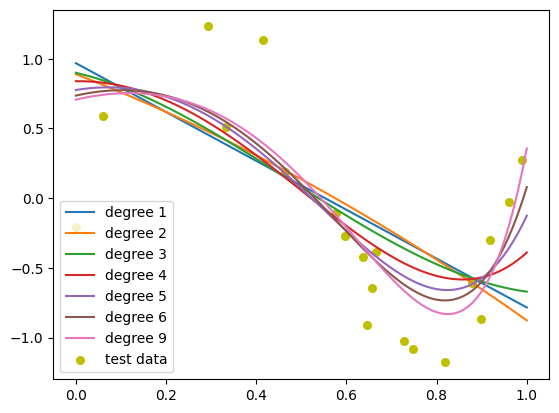

In [30]:
power = [1,2, 3,4,5, 6, 9]
x_dummy = np.linspace(0, 1, 100)
for degree in power:
    #fit model với tập train
    X_train = create_design_matrix(x_train, degree)
    model.fit(X_train, y_train)
    
    #visualise chỉ trên x_dummy
    X_test = create_design_matrix(x_dummy, degree)
    y_pred = model.predict(X_test)
    
    plt.plot(x_dummy,y_pred, label= f'degree {degree}')

    
plt.scatter(x_test, y_test, facecolor="y", edgecolor="y", s=30, label="test data")
plt.legend()

## Nhận xét

# 4: Với model đa thức bậc 9, mô hình bị overfitting, thử các cách sau để tránh overfitting:

# 4a: Tăng tập train thêm 10 điểm dữ liệu

# 4b: Tăng tập train thêm 90 điểm dữ liệu

#4c: thử Ridge regression implement ở trên với các giá trị $\lambda$ khác nhau (0.1, 1, 10,...) xem giá trị nào tránh overfitting tốt nhất.